In [1]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## Steady State

In [2]:
# z = [u, v, w, y]


# Rate Constants
k1aaCT  = 0.015
k2      = 0
k3CT    = 200
k4prime = 0.018
k5tilP  = 0
k7      = 0.6
k8tilP  = 50 # >> k9
k9      = 10 # >> k6


# Steady State Initial Conditions
u0 = 0.001
v0 = 0.24
w0 = 0.001
y0 = 0.26
k4 = 180
k6 = 1

t0 = 0
tf = 100


def steadystate(t, z):
    dudt = k4*(z[2] - z[0])*(k4prime/k4 + (z[0])**2) - k6*z[0]
    dvdt = k1aaCT - k2*(z[1] - z[2]) - k6*z[0]
    dwdt = k3CT*(1 - z[2])*(z[1] - z[2]) - k6*z[0]
    dydt = k1aaCT - k2*(z[1] - z[2]) - k7*(z[3] - z[1])
    
    
    return [dudt, dvdt, dwdt, dydt]

ss = solve_ivp(steadystate, (t0, tf), [u0, v0, w0, y0])


u_1 = ss.y[0]
v_1 = ss.y[1]
w_1 = ss.y[2]
y_1 = ss.y[3]
    

## Spontaneous Oscillations

In [3]:
# Spontaneous Oscillations Initial Conditions
u0 = 0.0074
v0 = 0.566
w0 = 0.566
y0 = 0.566
k4 = 180
k6 = 2

t0 = 0
tf = 100


def spontosc(t, z):
    dudt = k4*(z[2] - z[0])*(k4prime/k4 + (z[0])**2) - k6*z[0]
    dvdt = k1aaCT - k2*(z[1] - z[2]) - k6*z[0]
    dwdt = k3CT*(1 - z[2])*(z[1] - z[2]) - k6*z[0]
    dydt = k1aaCT - k2*(z[1] - z[2]) - k7*(z[3] - z[1])
    
    
    return [dudt, dvdt, dwdt, dydt]

osc = solve_ivp(spontosc, (t0, tf), [u0, v0, w0, y0])


u_2 = osc.y[0]
v_2 = osc.y[1]
w_2 = osc.y[2]
y_2 = osc.y[3]

    

## Excitable Switch

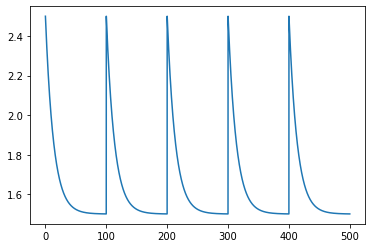

In [14]:
# z = [u, v, w, y, k6]

# Excitable Switch Initial Conditions
u0 = 0.0074
v0 = 0.566
w0 = 0.566
y0 = 0.566
k4 = 180


k60 = 2.5

interval = 100
no_repeats = 5

# t_a = np.linspace(0, interval, interval*10)
# t = np.linspace(0, interval*no_repeats, interval*no_repeats*10)
# teval = list(t)

# k6 = []
# a = 1.5 + np.exp(-0.075*t_a)
# a = list(a)

# for i in range(no_repeats):
#     k6.append(a)

# k6 = [item for sublist in k6 for item in sublist]

# plt.plot(t, k6)

# t0 = 0
# tf = 500

# print(len(k6))
# print(len(t))


def switch(t, z):
    dudt = k4*(z[2] - z[0])*(k4prime/k4 + (z[0])**2) - z[4]*z[0]
    dvdt = k1aaCT - k2*(z[1] - z[2]) - z[4]*z[0]
    dwdt = k3CT*(1 - z[2])*(z[1] - z[2]) - z[4]*z[0]
    dydt = k1aaCT - k2*(z[1] - z[2]) - k7*(z[3] - z[1])
    dk6  = 0.075*np.exp(-0.075*t) % 
        
    
    
    return [dudt, dvdt, dwdt, dydt, dk6]

swi = solve_ivp(switch, (t0, tf), [u0, v0, w0, y0, k60], t_eval=teval)


u_3 = swi.y[0]
v_3 = swi.y[1]
w_3 = swi.y[2]
y_3 = swi.y[3]

plt.plot(t, k6)
plt.show()

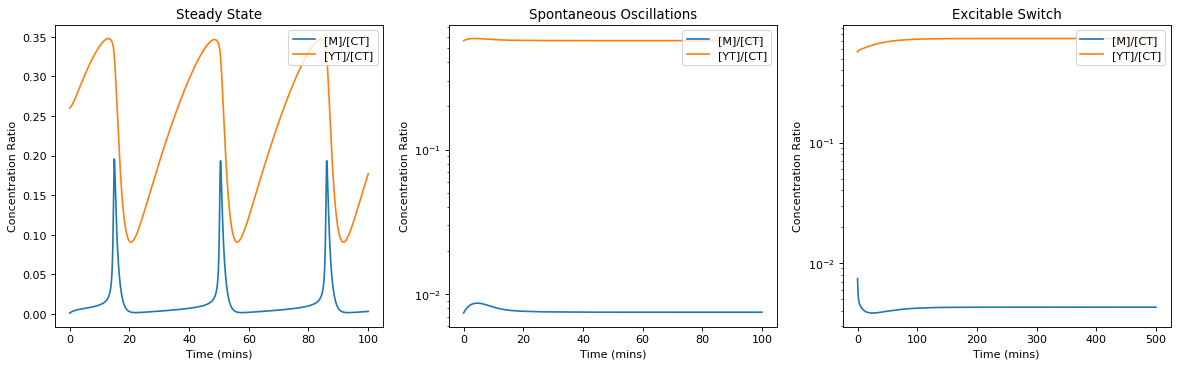

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5), dpi=80, facecolor='w', edgecolor='k')
ax1.plot(ss.t, u_1, label='[M]/[CT]')
ax1.plot(ss.t, y_1, label='[YT]/[CT]')
ax1.set_xlabel('Time (mins)')
ax1.legend(loc='upper right')
ax1.set_ylabel('Concentration Ratio')
ax1.set_title('Steady State')

ax2.plot(osc.t, u_2, label='[M]/[CT]')
ax2.plot(osc.t, y_2, label='[YT]/[CT]')
ax2.set_xlabel('Time (mins)')
ax2.legend(loc='upper right')
ax2.set_ylabel('Concentration Ratio')
ax2.set_yscale('log')
ax2.set_title('Spontaneous Oscillations')

ax3.plot(swi.t, u_3, label='[M]/[CT]')
ax3.plot(swi.t, y_3, label='[YT]/[CT]')
ax3.set_xlabel('Time (mins)')
ax3.legend(loc='upper right')
ax3.set_ylabel('Concentration Ratio')
ax3.set_yscale('log')
ax3.set_title('Excitable Switch')

plt.show()

In [ ]:
# # v = [C2, CP, M, pM, Y, YP]


# # Rate Constants
# k1aaCT  = 0.015
# k2      = 0
# k3CT    = 200
# k4      = 180 # adjustable
# k4prime = 0.018
# k5tilP  = 0
# k6      = 1 # adjustable
# k7      = 0.6
# k8tilP  = 50 # >> k9
# k9      = 10 # >> k6


# # Initial Conditions
# C20 = 0.015
# CP0 = 0.015
# pM0 = 0.001
# M0  = 0.001
# Y0  = 0.005
# YP0 = 0.005
# t0 = 0
# tf = 30


# def system(t, v):
#     dC2 = k6*v[2] - k8tilP*v[0] + k9*v[1]
#     dCP = -k3CT*v[1]*v[4]/(v[0]+v[1]+v[2]+v[3]) + k8tilP*v[0] - k9*v[1]
#     dpM = k3CT*v[1]*v[4]/(v[0]+v[1]+v[2]+v[3]) - v[3]*(k4prime + k4*v[2]/(v[0] + v[1])**2) + k5tilP*v[2]
#     dM  = v[3]*(k4prime + k4*v[2]/(v[0] + v[1])**2) - k5tilP*v[2] - k6*v[2]
#     dY  = k1aaCT*(v[0]+v[1]+v[2]+v[3]) - k2*v[4] - k3CT*v[1]*v[4]/(v[0]+v[1]+v[2]+v[3])
#     dYP = k6*v[2] - k7*v[5]
#     return [dC2, dCP, dpM, dM, dY, dYP]

# solution = solve_ivp(system, (t0, tf), [C20, CP0, pM0, M0, Y0, YP0])


# C2 = solution.y[0]
# CP = solution.y[1]
# pM = solution.y[2]
# M  = solution.y[3]
# Y  = solution.y[4]
# YP = solution.y[5]

# YT = Y + YP + pM + M
# CT = C2 + CP + pM + M

    

In [ ]:
# plt.plot(solution.t, M/CT, label='[M]/[CT]')
# plt.plot(solution.t, YT/CT, label='[YT]/[CT]')
# plt.xlabel('Time (mins)')
# plt.legend()
# plt.ylabel('Concentration Ratio')

# plt.show()